In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [180]:
wine_data = pd.read_csv("winequality-red.csv")

In [181]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\cem-c\AppData\Local\Temp\ipykernel_16860\960100292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="quality", data=wine_data, palette=wine_palette)


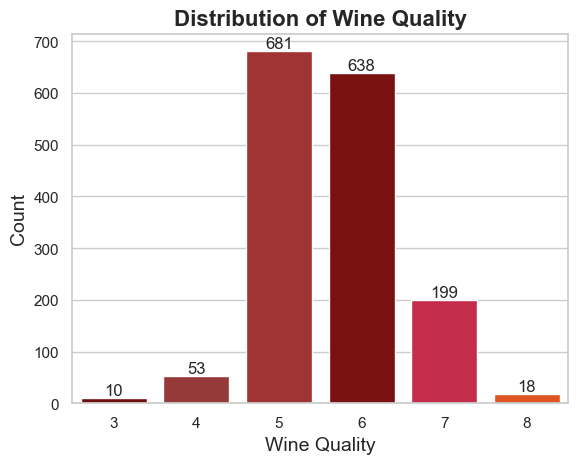

In [182]:
# Set the theme
sns.set_theme(style="whitegrid")

# Create a wine-themed palette
wine_palette = sns.color_palette(["#800000", "#A52A2A", "#B22222", "#8B0000", "#DC143C", "#FF4500"])

# Create the countplot
ax = sns.countplot(x="quality", data=wine_data, palette=wine_palette)
plt.title("Distribution of Wine Quality", fontsize=16, weight="bold")
plt.xlabel("Wine Quality", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [183]:
## Checking the null values

In [184]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [185]:
print("Number of duplicate rows:", wine_data.duplicated().sum())

Number of duplicate rows: 240


In [186]:
wine_data.drop_duplicates(inplace=True)

In [187]:
print("Number of duplicate rows:", wine_data.duplicated().sum())

Number of duplicate rows: 0


In [188]:
## Checking the outliers

In [189]:
features = wine_data.columns[:-1]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

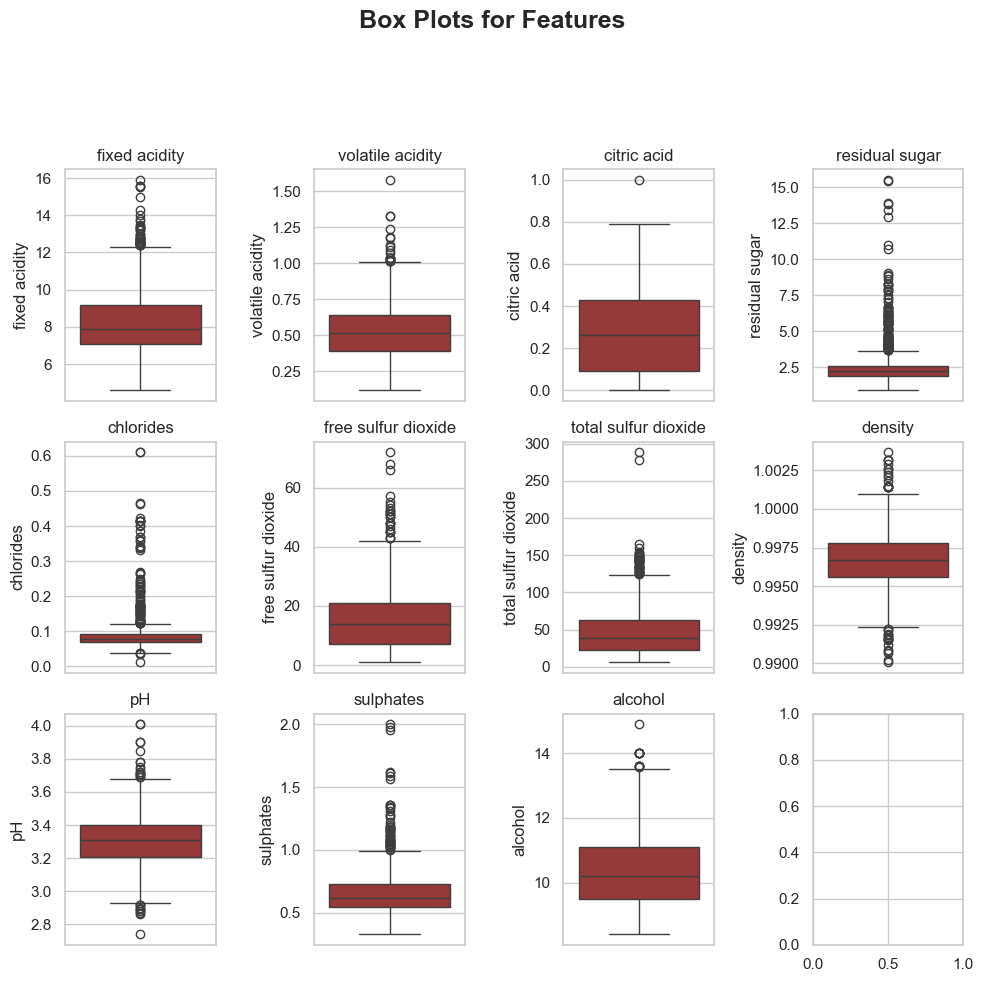

In [190]:
fig, axes = plt.subplots(3,4,figsize=(10,10))
fig.suptitle("Box Plots for Features", fontsize= 18, weight = "bold")

for i, feature in enumerate(features):
    row, col = divmod(i,4)
    sns.boxplot(y=wine_data[feature], ax = axes[row][col], color="#A52A2A")
    axes[row][col].set_title(feature, fontsize = 12)

plt.tight_layout(rect = [0,0,1,0.90])
plt.show()

In [191]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

C:\Users\cem-c\AppData\Local\Temp\ipykernel_16860\3278088200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=feature, data=wine_data, ax=axes[row][col], palette="coolwarm")
C:\Users\cem-c\AppData\Local\Temp\ipykernel_16860\3278088200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=feature, data=wine_data, ax=axes[row][col], palette="coolwarm")
C:\Users\cem-c\AppData\Local\Temp\ipykernel_16860\3278088200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y=feature, data=wine_data, ax=axes[ro

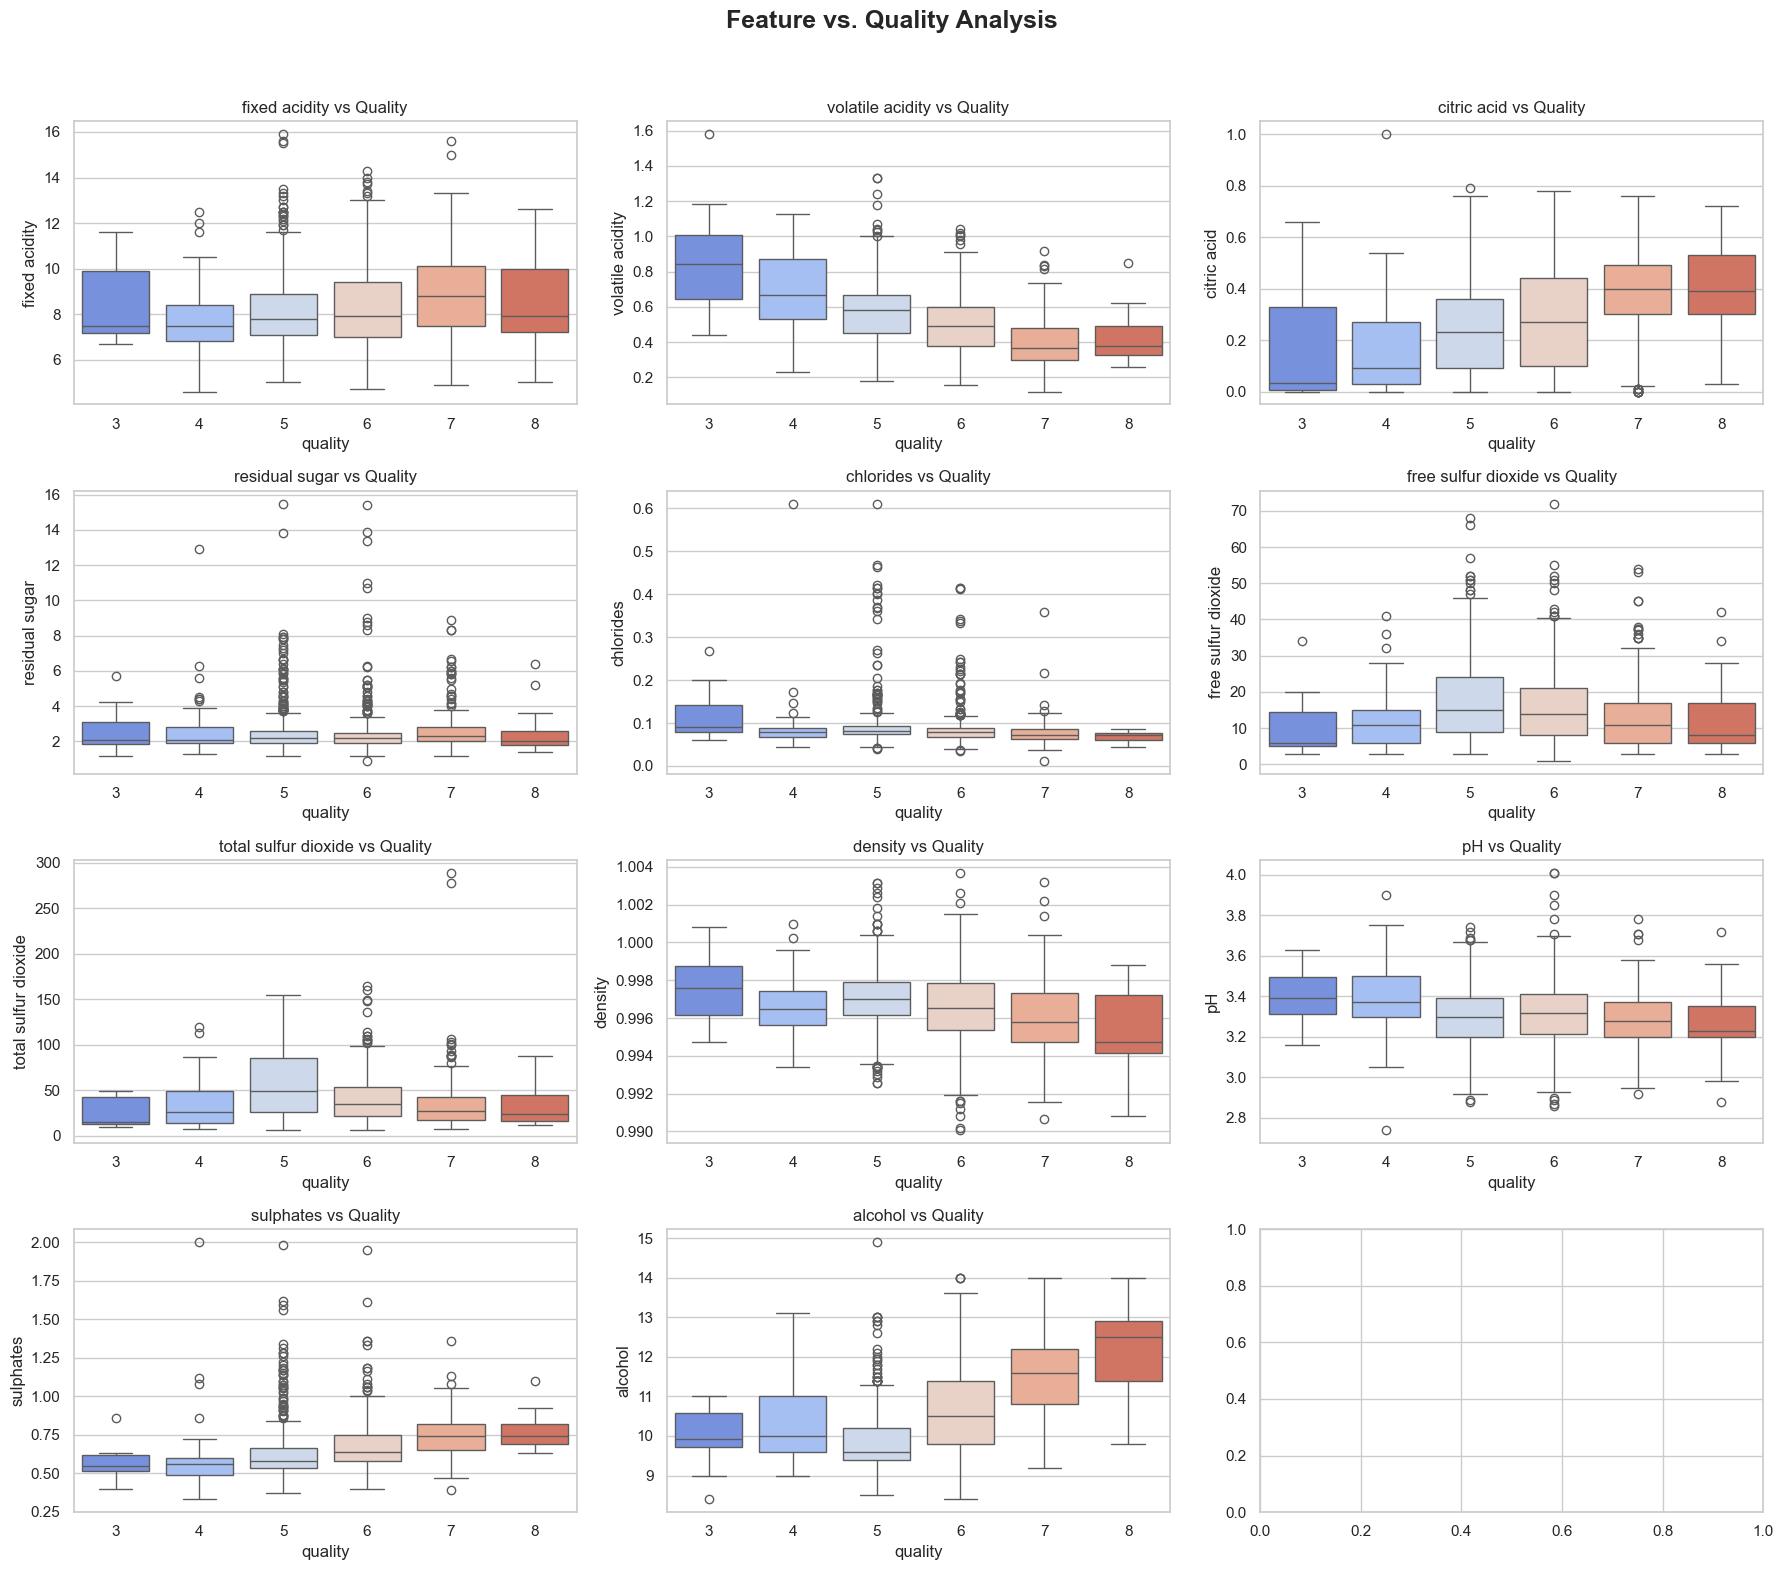

In [192]:
# Create a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))  # Adjust rows/columns as needed
fig.suptitle("Feature vs. Quality Analysis", fontsize=18, weight="bold")

# Loop through features and plot each in a grid
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Determine grid position
    sns.boxplot(x="quality", y=feature, data=wine_data, ax=axes[row][col], palette="coolwarm")
    axes[row][col].set_title(f"{feature} vs Quality", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()

In [193]:
#Implement Class Grouping
bins = [0,5,6.5,10]
labels = ['Low','Medium', 'High']
wine_data['quality_group'] = pd.cut(wine_data['quality'],bins = bins, labels = labels)

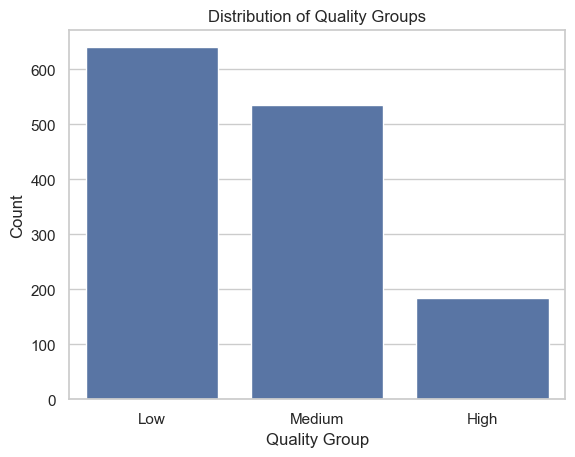

In [194]:
sns.countplot(x='quality_group', data=wine_data)
plt.title('Distribution of Quality Groups')
plt.xlabel('Quality Group')
plt.ylabel('Count')
plt.show()

In [195]:
X = wine_data.drop(['quality', 'quality_group'], axis = 1)
y = wine_data['quality_group']

In [196]:
def iqr_filter(dataset,col):
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

    return filtered_data

In [197]:
numerical_features = wine_data.drop(['quality', 'quality_group'], axis=1).columns

In [198]:
filtered_data = wine_data.copy()

In [199]:
for feature in numerical_features:
    filtered_data = iqr_filter(filtered_data, feature)

In [200]:
print(f"Original dataset size: {wine_data.shape}")
print(f"Filtered dataset size: {filtered_data.shape}")

Original dataset size: (1359, 13)
Filtered dataset size: (985, 13)


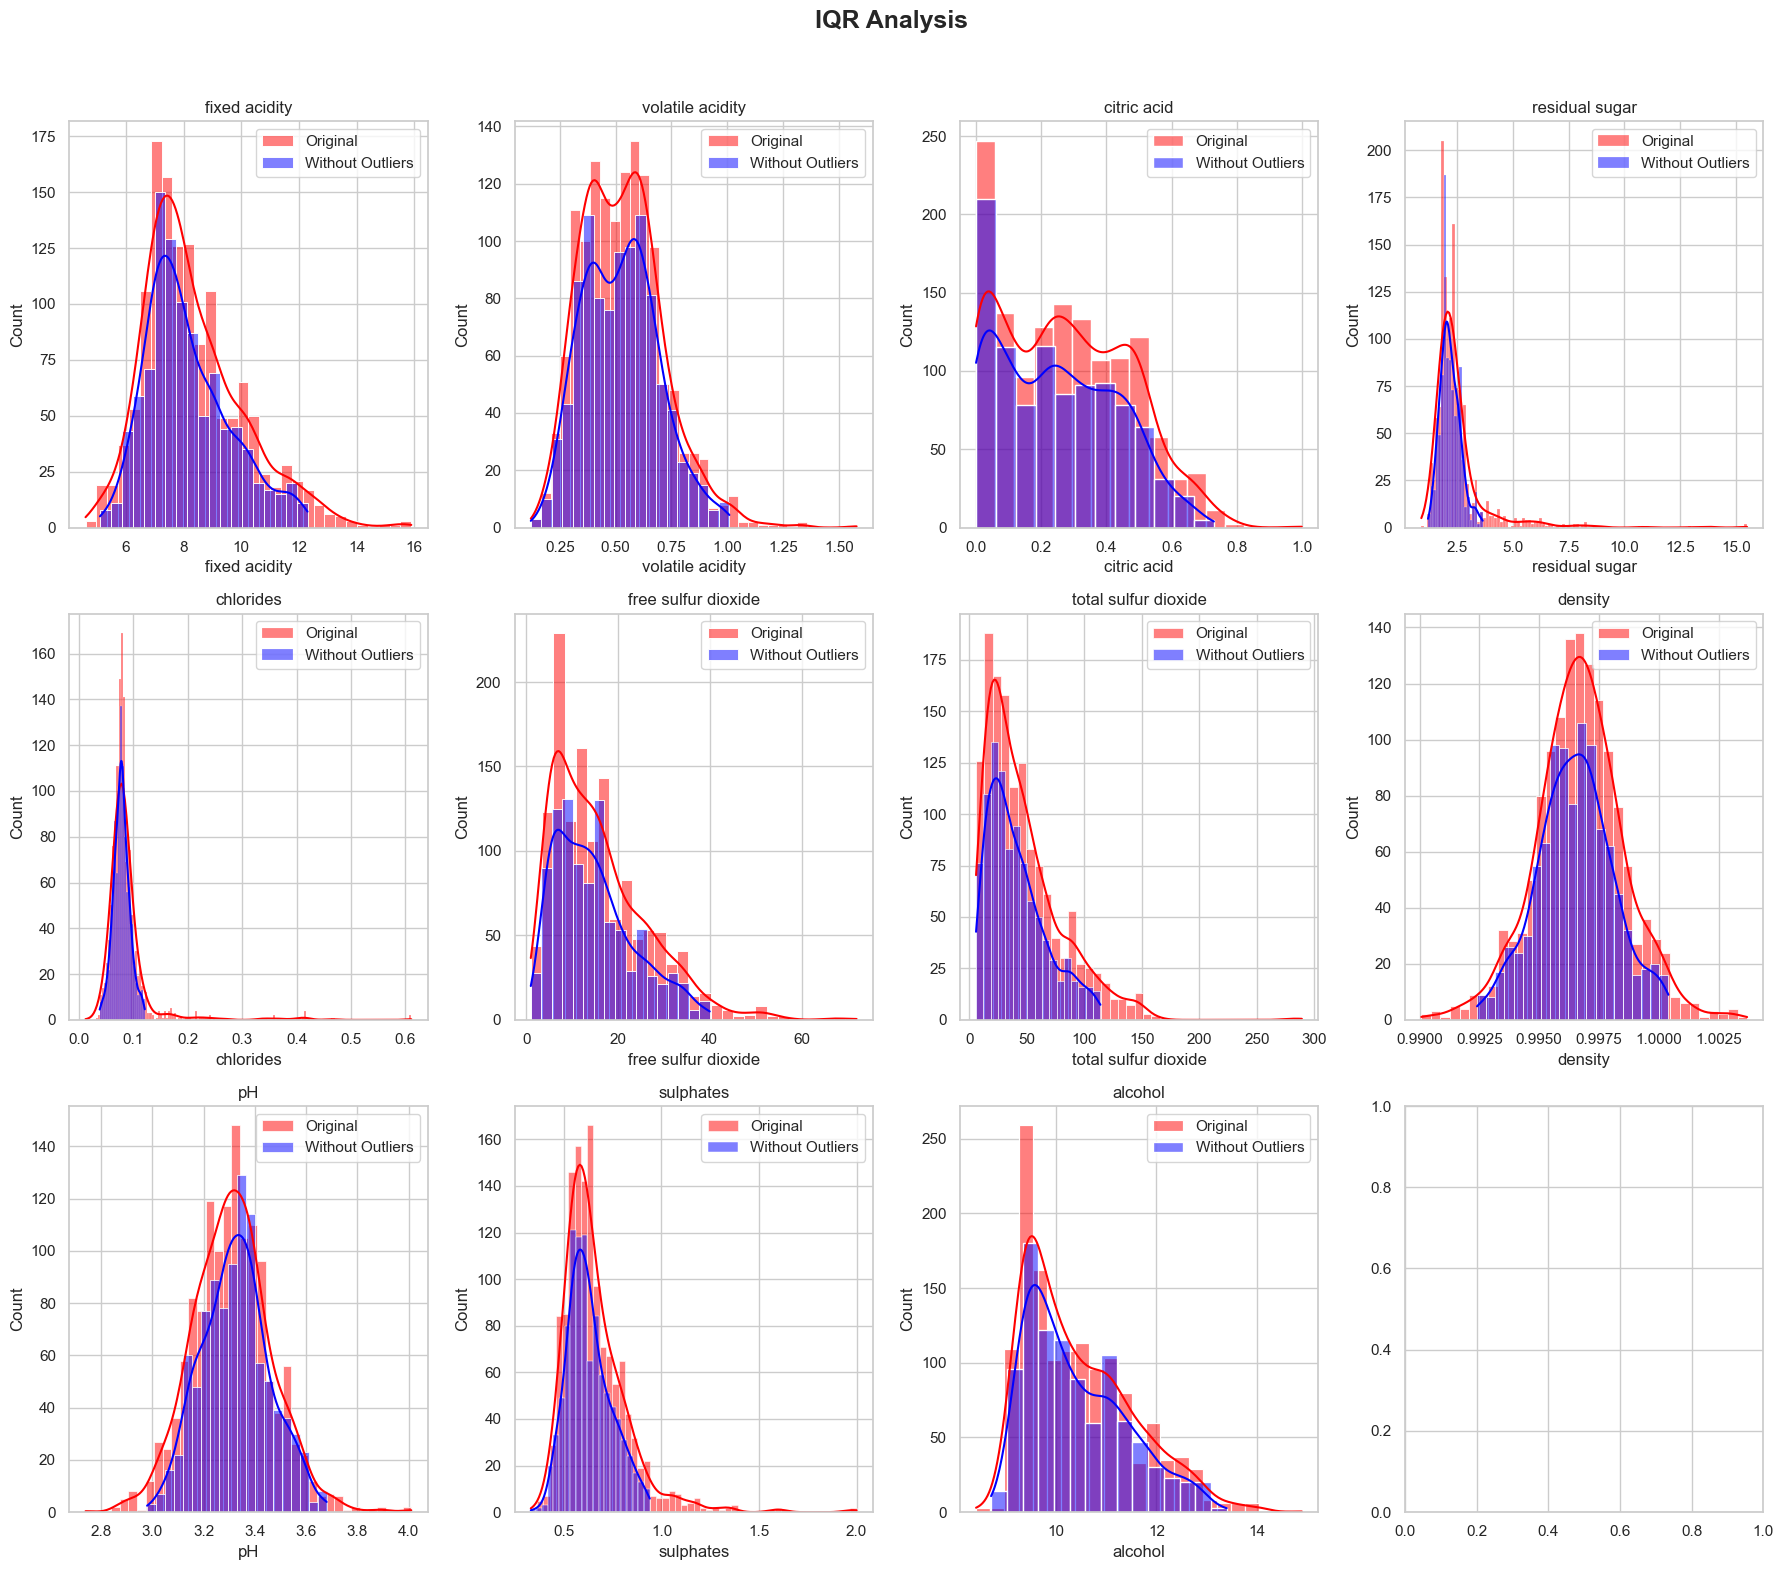

In [201]:
# Create a grid for IQR analysis
fig, axes = plt.subplots(3, 4, figsize=(18, 16))  # Adjust the grid size
fig.suptitle("IQR Analysis", fontsize=18, weight="bold")

# Loop through features
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 4)  # Grid positioning

    # Original and IQR-filtered histograms
    sns.histplot(wine_data[feature], kde=True, color="red", label="Original", ax=axes[row][col])
    sns.histplot(filtered_data[feature], kde=True, color="blue", label="Without Outliers", ax=axes[row][col])

    # Title and clean axis
    axes[row][col].set_title(f"{feature}", fontsize=12)
    axes[row][col].legend()  # Add legend for each plot

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()
    

In [202]:
#Random Forest Regressor, Random Forest Classifier, K-Means

In [203]:
filtered_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low


In [204]:
#Random Forest Regressor
X = filtered_data.drop(columns=["quality","quality_group"],axis = 1)
y = filtered_data["quality"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [206]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [207]:
y_pred = rf_regressor.predict(X_test)

In [208]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.5207106598984772
RMSE: 0.644467276955153
R²: 0.44035639191722775


C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [209]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_regressor.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)


                 Feature  Importance
10               alcohol    0.281255
9              sulphates    0.158399
1       volatile acidity    0.103741
6   total sulfur dioxide    0.082159
4              chlorides    0.066746
8                     pH    0.059209
7                density    0.054386
5    free sulfur dioxide    0.051708
2            citric acid    0.050929
3         residual sugar    0.047485
0          fixed acidity    0.043983


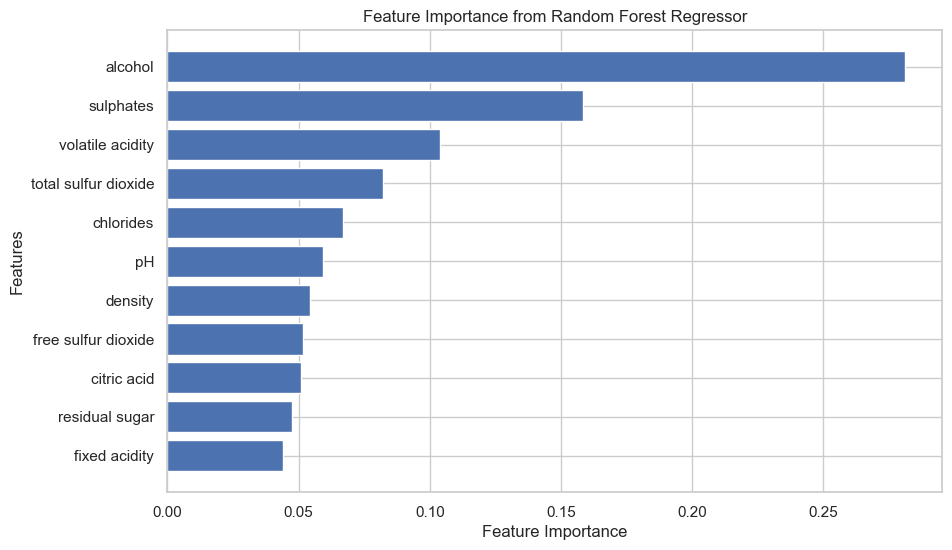

In [210]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()


In [211]:
#Future Engineering

In [212]:
#Step 1: Feature Creation
# Adding Acidity Balance
wine_data['acidity_balance'] = wine_data['fixed acidity'] / (wine_data['volatile acidity'] + 1e-5)
# Adding Alcohol-Density Interaction
wine_data['alcohol_density'] = wine_data['alcohol'] * wine_data['density']

In [213]:
#Step 2:Transform Skewed Features
# Log Transformation for Skewed Features
wine_data['log_residual_sugar'] = np.log1p(wine_data['residual sugar'])
wine_data['log_free_sulfur_dioxide'] = np.log1p(wine_data['free sulfur dioxide'])


In [214]:
#Step 3: Bin Continuous Features
# Binning Alcohol Levels
wine_data['alcohol_bin'] = pd.cut(wine_data['alcohol'], bins=[0, 10, 12, 15], labels=['Low', 'Medium', 'High'])


In [215]:
#Step 4: Add Interaction Terms
# Adding Alcohol-Sulphates Interaction
wine_data['alcohol_sulphates'] = wine_data['alcohol'] * wine_data['sulphates']


In [216]:
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group,acidity_balance,alcohol_density,log_residual_sugar,log_free_sulfur_dioxide,alcohol_bin,alcohol_sulphates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low,10.571278,9.37932,1.064711,2.484907,Low,5.264
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low,8.863536,9.76864,1.280934,3.258097,Low,6.664
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low,10.263023,9.77060,1.193922,2.772589,Low,6.370
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium,39.998571,9.78040,1.064711,2.890372,Low,5.684
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low,11.211951,9.37932,1.029619,2.639057,Low,5.264


In [217]:
wine_data.isnull().sum()


fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
quality_group              0
acidity_balance            0
alcohol_density            0
log_residual_sugar         0
log_free_sulfur_dioxide    0
alcohol_bin                0
alcohol_sulphates          0
dtype: int64

In [218]:
#Feature Selection
# Set a threshold for feature selection
threshold = 0.05
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()

print("Selected Features:", selected_features)


Selected Features: ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'chlorides', 'pH', 'density', 'free sulfur dioxide', 'citric acid']


In [219]:
#Random Forest Classifier
X = wine_data[selected_features]
y = wine_data['quality_group']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [221]:
#SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [222]:
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution after SMOTE: quality_group
Low       505
Medium    505
High      505
Name: count, dtype: int64


In [223]:
#Train the model on the Resampled Data
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [224]:
#Make predictions on the original test set
y_pred = rf_classifier.predict(X_test)

In [225]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6397058823529411
Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.74      0.54        34
         Low       0.81      0.73      0.77       135
      Medium       0.55      0.50      0.52       103

    accuracy                           0.64       272
   macro avg       0.60      0.65      0.61       272
weighted avg       0.66      0.64      0.64       272

Confusion Matrix:
 [[25  1  8]
 [ 3 98 34]
 [30 22 51]]


In [226]:
# Grid Search CV

In [227]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples at each leaf
}

In [228]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)


In [229]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [230]:
# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [231]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.7346534653465346


In [232]:
# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [233]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6323529411764706
Classification Report:
               precision    recall  f1-score   support

        High       0.42      0.74      0.54        34
         Low       0.79      0.73      0.76       135
      Medium       0.55      0.48      0.51       103

    accuracy                           0.63       272
   macro avg       0.59      0.65      0.60       272
weighted avg       0.65      0.63      0.64       272



In [234]:
#Experimenting with SVC
# Initialize the SVC model with default or reasonable hyperparameters
svc = SVC(C=10, kernel='linear', gamma='auto', random_state=42)

In [235]:
# Train the model on the resampled training data
svc.fit(X_train_resampled, y_train_resampled)

SVC(C=10, gamma='auto', kernel='linear', random_state=42)

In [236]:
# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

In [237]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.5992647058823529
Classification Report:
               precision    recall  f1-score   support

        High       0.36      0.74      0.48        34
         Low       0.76      0.76      0.76       135
      Medium       0.53      0.35      0.42       103

    accuracy                           0.60       272
   macro avg       0.55      0.61      0.55       272
weighted avg       0.62      0.60      0.60       272

Confusion Matrix:
 [[ 25   3   6]
 [  7 102  26]
 [ 38  29  36]]


In [238]:
#Experiment with Gradient Boosting Classifier
# Define the parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [2, 3, 4],  # Depth of the tree
}

In [239]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

In [240]:
# Set up GridSearchCV
gb_grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=gb_param_grid,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Display progress
    n_jobs=-1  # Use all available cores
)

In [241]:
# Fit the model to the resampled training data
gb_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [242]:
# Print the best parameters and best score
print("Best Parameters:", gb_grid_search.best_params_)
print("Best Cross-Validated Accuracy:", gb_grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.7161716171617162


In [243]:
# Evaluate the best model on the test set
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)

In [244]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Test Accuracy: 0.6360294117647058
Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.62      0.53        34
         Low       0.79      0.70      0.75       135
      Medium       0.53      0.55      0.54       103

    accuracy                           0.64       272
   macro avg       0.60      0.62      0.61       272
weighted avg       0.65      0.64      0.64       272

Confusion Matrix:
 [[21  1 12]
 [ 2 95 38]
 [22 24 57]]


In [245]:
# K Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data[selected_features])

In [246]:
pd.DataFrame(X_scaled, columns = selected_features).head()

,alcohol,sulphates,volatile acidity,total sulfur dioxide,chlorides,pH,density,free sulfur dioxide,citric acid
0,-0.954374,-0.578561,0.932000,-0.384050,-0.245623,1.291872,0.584003,-0.468554,-1.393258
1,-0.584575,0.124822,1.915800,0.604073,0.200094,-0.708395,0.048737,0.872003,-1.393258
2,-0.584575,-0.051024,1.259934,0.214813,0.078535,-0.321247,0.155790,-0.085537,-1.188617
3,-0.584575,-0.461331,-1.363534,0.394471,-0.265883,-0.966495,0.691057,0.105971,1.471711
4,-0.954374,-0.578561,0.713378,-0.204391,-0.265883,1.291872,0.584003,-0.277045,-1.393258


In [247]:
#Elbow method to find optimal k
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

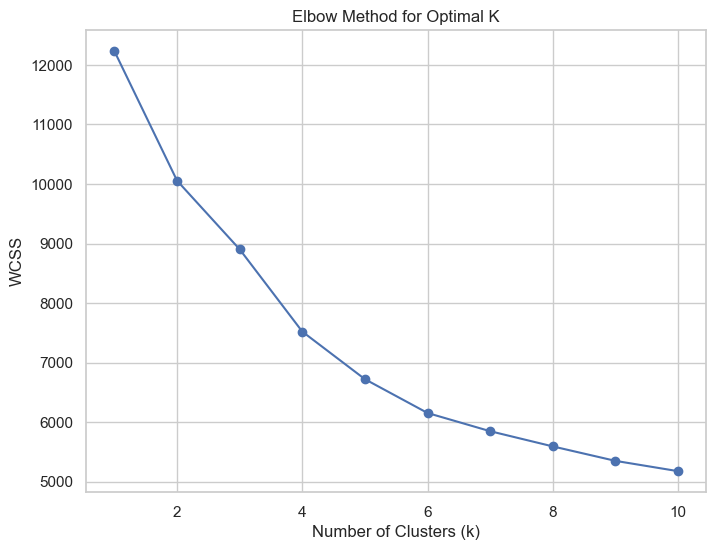

In [248]:
#Plot the Elbow Method
plt.figure(figsize = (8,6))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [249]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [250]:
kmeans.fit(X_scaled)

C:\Users\cem-c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [251]:
labels = kmeans.labels_

In [252]:
wine_data['Cluster'] = labels

In [253]:
sil_score = silhouette_score(X_scaled, labels)

In [254]:
print(f"Silhouette Score for k=3: {sil_score:.3f}")

Silhouette Score for k=3: 0.210
